In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv("https://github.com/lab-pep-itba/clase-2--Probabilidad/raw/master/alturas-pesos-mils-test.csv", index_col = "Unnamed: 0")

In [21]:
df.head()

,Genero,Peso,Altura
1100,Hombre,90.202,177.680
7781,Mujer,60.890,164.175
5909,Mujer,67.629,171.506
3924,Hombre,87.164,174.504
120,Hombre,75.231,160.672


In [31]:
df["label"] = 1*(df["Genero"] == "Hombre")

In [86]:
df["Peso_norm"] = (df["Peso"] - df["Peso"].mean())/df["Peso"].std()
df["Altura_norm"] = (df["Altura"] - df["Altura"].mean())/df["Altura"].std()

In [87]:
df.head()

,Genero,Peso,Altura,label,Peso_norm,Altura_norm
1100,Hombre,90.202,177.680,1,1.235302,1.017550
7781,Mujer,60.890,164.175,0,-0.806153,-0.389749
5909,Mujer,67.629,171.506,0,-0.336811,0.374184
3924,Hombre,87.164,174.504,1,1.023718,0.686592
120,Hombre,75.231,160.672,1,0.192636,-0.754781


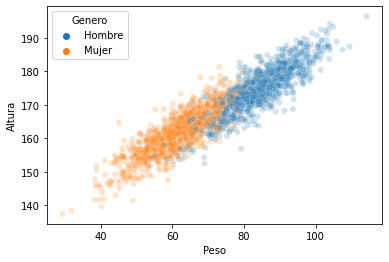

In [27]:
sns.scatterplot(x="Peso", y = "Altura", data = df, hue = "Genero", alpha = 0.2)

In [88]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df["Genero"])

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Pesos del modelo sin entrenar
model.layers[0].get_weights()

[array([[-1.0389991],
        [-0.6011658]], dtype=float32), array([0.], dtype=float32)]

In [60]:
df[["Peso", "Altura"]].values

array([[ 90.202, 177.68 ],
       [ 60.89 , 164.175],
       [ 67.629, 171.506],
       ...,
       [ 51.971, 154.277],
       [ 82.536, 172.26 ],
       [ 62.409, 166.244]])

In [61]:
y = df_train[["label"]].values

In [62]:
y

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [94]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [151]:
model = Sequential()

In [152]:
#model.add(Dense(100, activation="relu"))
model.add(Dense(1, input_shape =(2,), activation="linear"))

In [153]:
model.compile(
    optimizer = SGD(learning_rate=1e-1),
    loss = "mse",)
    #metrics = "accuracy")

In [154]:
history = model.fit(
    x = df_train[["Peso_norm", "label"]].values,
    y = df_train[["Altura"]].values,
    validation_data = (
        df_test[["Peso_norm", "label"]].values,
        df_test[["Altura"]].values
    ),
    epochs = 10,
    batch_size = 4,
    )

Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 257.1511 - val_loss: 13.5414
Epoch 2/10
350/350 [==============================] - 1s 1ms/step - loss: 14.6799 - val_loss: 14.5815
Epoch 3/10
350/350 [==============================] - 0s 1ms/step - loss: 14.9112 - val_loss: 13.7720
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 14.5783 - val_loss: 13.3894
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 14.8509 - val_loss: 13.6717
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 14.8845 - val_loss: 13.5865
Epoch 7/10
350/350 [==============================] - 0s 1ms/step - loss: 14.7069 - val_loss: 12.8765
Epoch 8/10
350/350 [==============================] - 0s 1ms/step - loss: 14.8355 - val_loss: 13.5590
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 14.7496 - val_loss: 13.2102
Epoch 10/10
350/350 [==============================] - 1s 1ms/step - loss: 14.924

In [133]:
from matplotlib import pyplot as plt

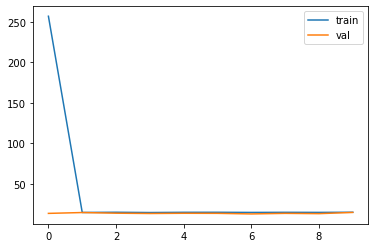

In [155]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()
# plt.plot(history.history["accuracy"], label="train")
# plt.plot(history.history["val_accuracy"], label="val")
# plt.legend()
# plt.show()

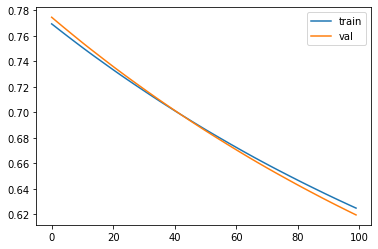

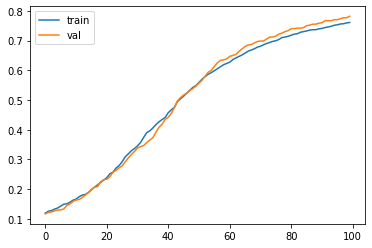

In [93]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()